In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

import sys
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

#classification ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#sklearn score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

#others
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [ ]:
# <H1>Data Wrangling & Visualization</H1>

In [ ]:
# The dataset is already loaded below
data = pd.read_csv("/content/bank_2.csv")

In [ ]:
data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes


In [ ]:
#Explore columns
data.columns

Index(['client_id', 'age_bracket', 'job', 'marital', 'education',
       'has_housing_loan', 'has_personal_loan', 'prev_call_day',
       'prev_call_month', 'prev_call_duration', 'days_since_last_call',
       'num_contacts_prev', 'subs_deposit'],
      dtype='object')

In [ ]:
data.describe()

,client_id,age_bracket,prev_call_day,prev_call_duration,days_since_last_call,num_contacts_prev
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.231948,15.658036,371.993818,51.330407,0.832557
std,3222.336187,11.913369,8.420740,347.128386,108.758282,2.292007
min,1.000000,18.000000,1.000000,2.000000,-1.000000,0.000000
25%,2791.250000,32.000000,8.000000,138.000000,-1.000000,0.000000
50%,5581.500000,39.000000,15.000000,255.000000,-1.000000,0.000000
75%,8371.750000,49.000000,22.000000,496.000000,20.750000,1.000000
max,11162.000000,95.000000,31.000000,3881.000000,854.000000,58.000000


In [ ]:
#based on this information, there is no missing data; so, no need to worry about the filling the missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   client_id             11162 non-null  int64 
 1   age_bracket           11162 non-null  int64 
 2   job                   11162 non-null  object
 3   marital               11162 non-null  object
 4   education             11162 non-null  object
 5   has_housing_loan      11162 non-null  object
 6   has_personal_loan     11162 non-null  object
 7   prev_call_day         11162 non-null  int64 
 8   prev_call_month       11162 non-null  object
 9   prev_call_duration    11162 non-null  int64 
 10  days_since_last_call  11162 non-null  int64 
 11  num_contacts_prev     11162 non-null  int64 
 12  subs_deposit          11162 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [ ]:
 # Visualization, Modeling, Machine Learning

In [ ]:
data.subs_deposit.value_counts()

no     5873
yes    5289
Name: subs_deposit, dtype: int64

In [ ]:
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
data.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
data.prev_call_month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: prev_call_month, dtype: int64

In [ ]:
#convert this into the numerical values

mon= {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

data['prev_call_month_nbr'] = data['prev_call_month'].map(mon);
data['prev_call_month_nbr'].value_counts()

5     2824
8     1519
7     1514
6     1222
11     943
4      923
2      776
10     392
1      344
9      319
3      276
12     110
Name: prev_call_month_nbr, dtype: int64

In [ ]:
data.describe()

,client_id,age_bracket,prev_call_day,prev_call_duration,days_since_last_call,num_contacts_prev,prev_call_month_nbr
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.231948,15.658036,371.993818,51.330407,0.832557,6.190826
std,3222.336187,11.913369,8.420740,347.128386,108.758282,2.292007,2.572792
min,1.000000,18.000000,1.000000,2.000000,-1.000000,0.000000,1.000000
25%,2791.250000,32.000000,8.000000,138.000000,-1.000000,0.000000,5.000000
50%,5581.500000,39.000000,15.000000,255.000000,-1.000000,0.000000,6.000000
75%,8371.750000,49.000000,22.000000,496.000000,20.750000,1.000000,8.000000
max,11162.000000,95.000000,31.000000,3881.000000,854.000000,58.000000,12.000000


In [ ]:
#Add a categorical variable prev_caontacted --> yes/ no
#logic : IF num_contacts_prev = -1 THEN 'no' ELSE 'yes'

def prev_contacted(n):
    if n >=1:
        return 'yes'
    else:
        return 'no'

data['prev_contacted'] = data['num_contacts_prev'].apply(prev_contacted)

data['prev_contacted'].value_counts()

no     8324
yes    2838
Name: prev_contacted, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   client_id             11162 non-null  int64 
 1   age_bracket           11162 non-null  int64 
 2   job                   11162 non-null  object
 3   marital               11162 non-null  object
 4   education             11162 non-null  object
 5   has_housing_loan      11162 non-null  object
 6   has_personal_loan     11162 non-null  object
 7   prev_call_day         11162 non-null  int64 
 8   prev_call_month       11162 non-null  object
 9   prev_call_duration    11162 non-null  int64 
 10  days_since_last_call  11162 non-null  int64 
 11  num_contacts_prev     11162 non-null  int64 
 12  subs_deposit          11162 non-null  object
 13  prev_call_month_nbr   11162 non-null  int64 
 14  prev_contacted        11162 non-null  object
dtypes: int64(7), object(8)
memory usage:

In [ ]:
var_cat = data.select_dtypes('object').columns.to_list()
#Remove the target column
var_cat.remove('subs_deposit')
var_cat

['job',
 'marital',
 'education',
 'has_housing_loan',
 'has_personal_loan',
 'prev_call_month',
 'prev_contacted']

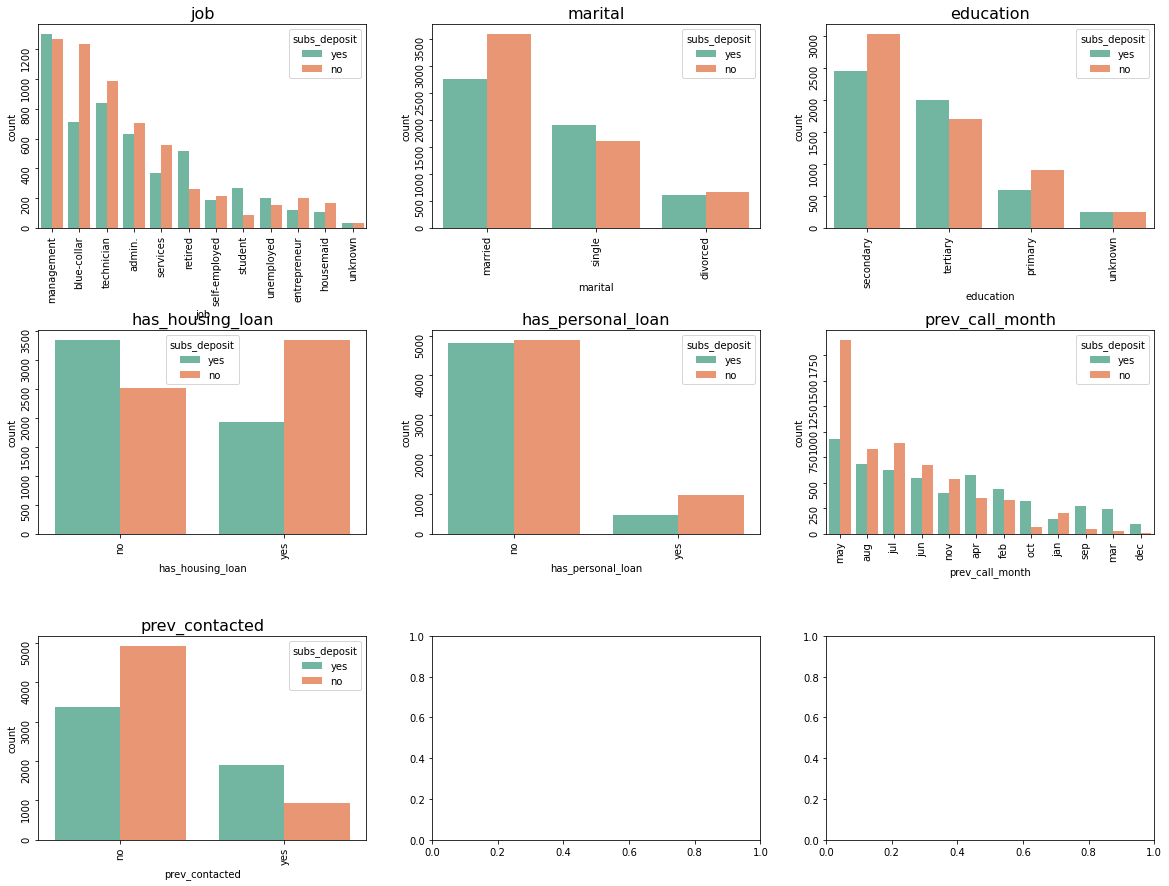

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

ax = ax.ravel()
position = 0

for i in var_cat:
    
    order = data[i].value_counts().index
    sb.countplot(data=data, x=i, ax=ax[position], hue='subs_deposit', palette='Set2', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':16})
    
    position += 1

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
var_num = data.select_dtypes(['int64', 'float64']).columns.to_list()
#var_num.remove('client_id')
len(var_num)

7

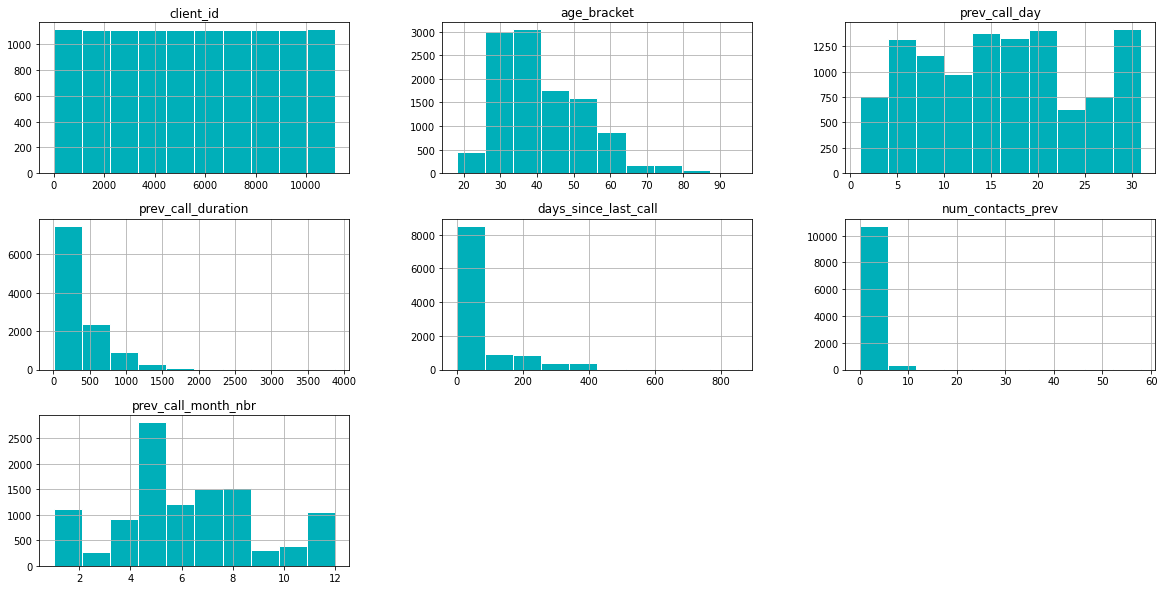

,client_id,age_bracket,prev_call_day,prev_call_duration,days_since_last_call,num_contacts_prev,prev_call_month_nbr
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.231948,15.658036,371.993818,51.330407,0.832557,6.190826
std,3222.336187,11.913369,8.420740,347.128386,108.758282,2.292007,2.572792
min,1.000000,18.000000,1.000000,2.000000,-1.000000,0.000000,1.000000
25%,2791.250000,32.000000,8.000000,138.000000,-1.000000,0.000000,5.000000
50%,5581.500000,39.000000,15.000000,255.000000,-1.000000,0.000000,6.000000
75%,8371.750000,49.000000,22.000000,496.000000,20.750000,1.000000,8.000000
max,11162.000000,95.000000,31.000000,3881.000000,854.000000,58.000000,12.000000


In [ ]:
data.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

display(data[var_num].describe())

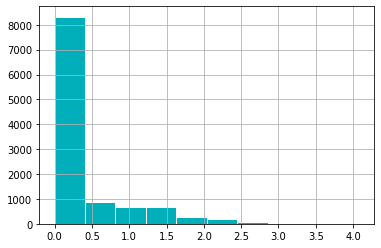

In [ ]:
#Based on the above, days_since_last_call ane num_contacts_prev are skewed

#num_contacts_prev
num_contacts_prev_log = np.log(data['num_contacts_prev']+1)
num_contacts_prev_log.hist(edgecolor='white', color='#00afb9')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


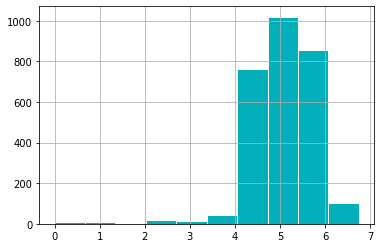

In [ ]:
#days_since_last_call
days_since_last_call_log = np.log(data['days_since_last_call'] )
days_since_last_call_log.hist(edgecolor='white', color='#00afb9')

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   client_id             11162 non-null  int64 
 1   age_bracket           11162 non-null  int64 
 2   job                   11162 non-null  object
 3   marital               11162 non-null  object
 4   education             11162 non-null  object
 5   has_housing_loan      11162 non-null  object
 6   has_personal_loan     11162 non-null  object
 7   prev_call_day         11162 non-null  int64 
 8   prev_call_month       11162 non-null  object
 9   prev_call_duration    11162 non-null  int64 
 10  days_since_last_call  11162 non-null  int64 
 11  num_contacts_prev     11162 non-null  int64 
 12  subs_deposit          11162 non-null  object
 13  prev_call_month_nbr   11162 non-null  int64 
 14  prev_contacted        11162 non-null  object
dtypes: int64(7), object(8)
memory usage:

In [ ]:
#Before generate the the corelation matrix, the categorical variables needs to be converted into Numertical variables

#******************************************
# *** 1 hot encoding is being used here ***
#******************************************

#1 marital
data_seg = data["marital"]

dum_df1 = pd.get_dummies(data_seg, columns=["marital"], prefix="m")
dum_df1.head(10)

#add these features into the main training df
data = data.join(dum_df1)

data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0


In [ ]:
#2 education 
data_edu = data["education"]

dum_df2 = pd.get_dummies(data_edu, columns=["education"], prefix="edu")
dum_df2.head(10)

#add these features into the main training df
data = data.join(dum_df2)

data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0


In [ ]:
#3 has_housing_loan 
data_hl = data["has_housing_loan"]

dum_df3 = pd.get_dummies(data_hl, columns=["has_housing_loan"], prefix="hl")
dum_df3.head(10)

#add these features into the main training df
data = data.join(dum_df3)

data.head()


,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,hl_no,hl_yes
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0,1,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0,1,0


In [ ]:
#4 has_personal_loan 
data_pl = data["has_personal_loan"]

dum_df4 = pd.get_dummies(data_pl, columns=["has_personal_loan"], prefix="pl")
dum_df4.head(10)

#add these features into the main training df
data = data.join(dum_df4)

data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,hl_no,hl_yes,pl_no,pl_yes
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0,1,0,1,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0,1,0,1,0


In [ ]:
data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,hl_no,hl_yes
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0,1,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0,1,0


In [ ]:
#option -2 for job (using pd.factorize method)


data["job_n"] = pd.factorize(data.job)[0]

data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,hl_no,hl_yes,pl_no,pl_yes,job_n
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,0
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0,1,0,1,0,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,1
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,2
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
#option -2 for subs_deposit (using pd.factorize method)


data["subs_deposit_n"] = pd.factorize(data.subs_deposit)[0]

data.head()

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_day,prev_call_month,prev_call_duration,days_since_last_call,num_contacts_prev,subs_deposit,prev_call_month_nbr,prev_contacted,m_divorced,m_married,m_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,hl_no,hl_yes,pl_no,pl_yes,job_n,subs_deposit_n
0,1,59,admin.,married,secondary,yes,no,5,may,1042,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,0,0
1,2,56,admin.,married,secondary,no,no,5,may,1467,-1,0,yes,5,no,0,1,0,0,1,0,0,1,0,1,0,0,0
2,3,41,technician,married,secondary,yes,no,5,may,1389,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,1,0
3,4,55,services,married,secondary,yes,no,5,may,579,-1,0,yes,5,no,0,1,0,0,1,0,0,0,1,1,0,2,0
4,5,54,admin.,married,tertiary,no,no,5,may,673,-1,0,yes,5,no,0,1,0,0,0,1,0,1,0,1,0,0,0


In [ ]:
#split the train and test data
tr_data, test_data = train_test_split(data, test_size=0.25, random_state=42)
print("Training set count: ", len(tr_data))
print("Test set count: ",len(test_data))

Training set count:  8371
Test set count:  2791


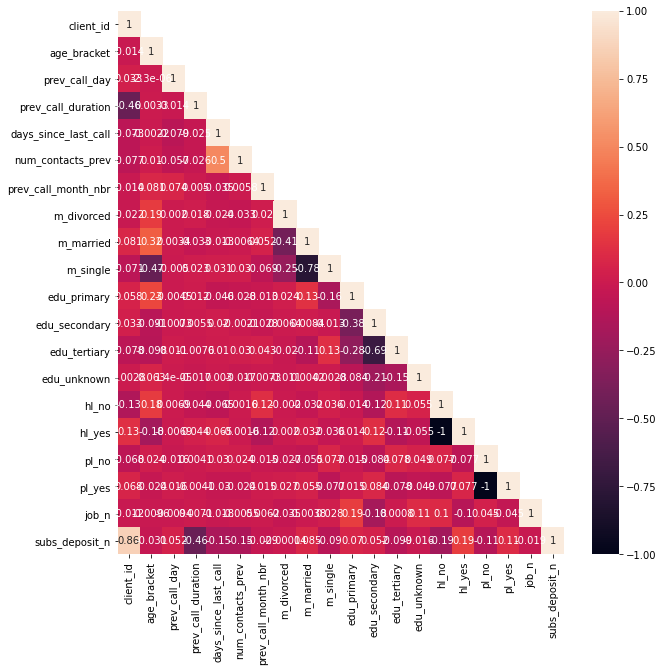

In [ ]:
#Corelation Matrix
#1 visualize in a heatmap

tr_cor_mat=tr_data.corr()

tr_mask=np.array(tr_cor_mat)
tr_mask[np.tril_indices_from(tr_mask)] = False

viz1=plt.gcf()
viz1.set_size_inches(10,10)

sb.heatmap(data=tr_cor_mat, mask=tr_mask, annot=True)

In [ ]:
#Corelation Matrix
#2 Looks at the values

tr_cor_mat["subs_deposit_n"].sort_values(ascending=False)

#The below result shows that dep_Non Refund, lead_time, seg_Groups, prev_cancel and ctyp_Transient are the top 5 features which are having high correlation with the cancellation

subs_deposit_n          1.000000
client_id               0.864549
hl_yes                  0.192292
pl_yes                  0.106714
m_married               0.084808
edu_primary             0.070452
prev_call_day           0.052310
edu_secondary           0.052107
m_divorced             -0.000135
edu_unknown            -0.016237
job_n                  -0.019323
prev_call_month_nbr    -0.029300
age_bracket            -0.030901
m_single               -0.090163
edu_tertiary           -0.099084
pl_no                  -0.106714
num_contacts_prev      -0.145177
days_since_last_call   -0.153627
hl_no                  -0.192292
prev_call_duration     -0.456498
Name: subs_deposit_n, dtype: float64

In [ ]:
#I think, this is the time to drop the least corelated features
# Keep the top/ bottom-N features (for this exercise)

tr_data_mdl = tr_data.copy()

features_sel = ['client_id','subs_deposit_n','hl_yes','pl_yes','m_married','edu_primary', 'm_single','edu_tertiary','pl_no','num_contacts_prev','days_since_last_call','hl_no','prev_call_duration']
tr_data_mdl.drop(tr_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

tr_data_mdl.head()

,client_id,prev_call_duration,days_since_last_call,num_contacts_prev,m_married,m_single,edu_primary,edu_tertiary,hl_no,hl_yes,pl_no,pl_yes,subs_deposit_n
5304,5305,98,-1,0,1,0,0,0,0,1,0,1,1
7512,7513,281,266,6,0,1,0,1,0,1,1,0,1
4700,4701,712,-1,0,0,1,0,0,0,1,1,0,0
4918,4919,566,-1,0,1,0,0,0,0,1,1,0,0
4450,4451,252,184,3,0,1,0,0,1,0,1,0,0


In [ ]:
#remove client_id coulmn from training dataset as this needs to be removed before run the actual prediction
tr_data_mdl.drop(['client_id'], axis=1, inplace=True)
tr_data_mdl.columns

Index(['prev_call_duration', 'days_since_last_call', 'num_contacts_prev',
       'm_married', 'm_single', 'edu_primary', 'edu_tertiary', 'hl_no',
       'hl_yes', 'pl_no', 'pl_yes', 'subs_deposit_n'],
      dtype='object')

In [ ]:
# Visualize the top N features and their feature importance.

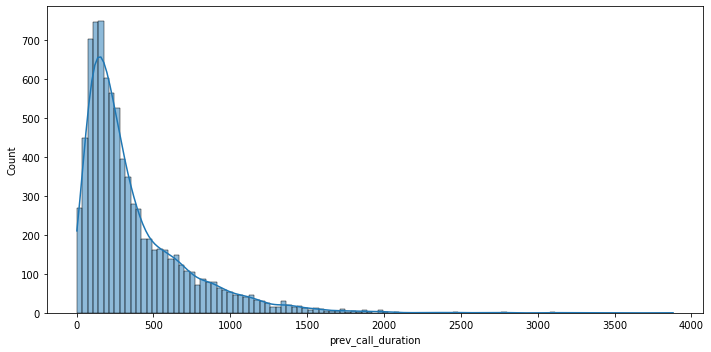

In [ ]:
#1 prev_call_duration
# use kde (kernel density estimation)

prev_call_dur = tr_data["prev_call_duration"]

plt.figure(figsize=(10,5))
sb.histplot(prev_call_dur, kde=True)
plt.tight_layout()
plt.show()

In [ ]:
# Test Data

test_data_mdl = test_data.copy()

features_sel = ['client_id','subs_deposit_n','hl_yes','pl_yes','m_married','edu_primary', 'm_single','edu_tertiary','pl_no','num_contacts_prev','days_since_last_call','hl_no','prev_call_duration']
test_data_mdl.drop(test_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

test_data_mdl.head()

,client_id,prev_call_duration,days_since_last_call,num_contacts_prev,m_married,m_single,edu_primary,edu_tertiary,hl_no,hl_yes,pl_no,pl_yes,subs_deposit_n
5527,5528,182,-1,0,0,0,0,0,1,0,1,0,1
4541,4542,1323,-1,0,1,0,0,0,1,0,1,0,0
1964,1965,456,300,1,0,1,0,0,0,1,1,0,0
5007,5008,784,-1,0,1,0,0,0,1,0,1,0,0
8928,8929,84,-1,0,1,0,0,1,0,1,1,0,1


In [ ]:
#remove is_cancelled column
test_data_mdl.drop("subs_deposit_n",axis=1,inplace=True)

test_data_mdl.head()

,client_id,prev_call_duration,days_since_last_call,num_contacts_prev,m_married,m_single,edu_primary,edu_tertiary,hl_no,hl_yes,pl_no,pl_yes
5527,5528,182,-1,0,0,0,0,0,1,0,1,0
4541,4542,1323,-1,0,1,0,0,0,1,0,1,0
1964,1965,456,300,1,0,1,0,0,0,1,1,0
5007,5008,784,-1,0,1,0,0,0,1,0,1,0
8928,8929,84,-1,0,1,0,0,1,0,1,1,0


In [ ]:
tr_data_mdl.head()

,prev_call_duration,days_since_last_call,num_contacts_prev,m_married,m_single,edu_primary,edu_tertiary,hl_no,hl_yes,pl_no,pl_yes,subs_deposit_n
5304,98,-1,0,1,0,0,0,0,1,0,1,1
7512,281,266,6,0,1,0,1,0,1,1,0,1
4700,712,-1,0,0,1,0,0,0,1,1,0,0
4918,566,-1,0,1,0,0,0,0,1,1,0,0
4450,252,184,3,0,1,0,0,1,0,1,0,0


In [ ]:
#*******************
#Model Selection
#*******************

#Precision and confusion matrix are the decision factor for the model selection
#To start with, evaluating the below two models

#1 KNN
#2 Random Forest
#3 Gradeient Boost

In [ ]:
tr_data_mdl.columns

Index(['prev_call_duration', 'days_since_last_call', 'num_contacts_prev',
       'm_married', 'm_single', 'edu_primary', 'edu_tertiary', 'hl_no',
       'hl_yes', 'pl_no', 'pl_yes', 'subs_deposit_n'],
      dtype='object')

In [ ]:
#validate the data types of all the columns; all are numeric
tr_data_mdl.columns.to_series().groupby(tr_data_mdl.dtypes).groups

{uint8: ['m_married', 'm_single', 'edu_primary', 'edu_tertiary', 'hl_no', 'hl_yes', 'pl_no', 'pl_yes'], int64: ['prev_call_duration', 'days_since_last_call', 'num_contacts_prev', 'subs_deposit_n']}

In [ ]:
len(tr_data_mdl)

8371

In [ ]:
#set 25% as test size from the training dataset; this is for train the model
x_train, x_test, y_train, y_test= train_test_split(tr_data_mdl.drop('subs_deposit_n',axis=1), tr_data_mdl['subs_deposit_n'], test_size=0.25, random_state=42)

In [ ]:
#1 KNN option-1 (default weights --> uniform)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#get the accuracy score
knn_pred=knn.predict(x_test)
score=metrics.accuracy_score(y_test,knn_pred)
print(score)

0.7649307214524605


In [ ]:
confusion_matrix(y_test, knn_pred)

array([[780, 220],
       [272, 821]])

In [ ]:
#f1 score
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.79      0.75      0.77      1093

    accuracy                           0.76      2093
   macro avg       0.77      0.77      0.76      2093
weighted avg       0.77      0.76      0.77      2093



In [ ]:
#1 KNN option-2 (default weights --> distance)
knn2 = KNeighborsClassifier(weights='distance')
knn2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
#get the accuracy score
knn_pred2=knn2.predict(x_test)
score2=metrics.accuracy_score(y_test,knn_pred2)
print(score2)

0.7520305781175346


In [ ]:
confusion_matrix(y_test, knn_pred2)

array([[783, 217],
       [302, 791]])

In [ ]:
#f1 score
print(classification_report(y_test, knn_pred2))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.78      0.72      0.75      1093

    accuracy                           0.75      2093
   macro avg       0.75      0.75      0.75      2093
weighted avg       0.75      0.75      0.75      2093



In [ ]:
#2 Random Forest

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#get the accuracy score
rf_pred=rf.predict(x_test)
rf_ascore=metrics.accuracy_score(y_test,rf_pred)
rf_pscore=metrics.precision_score(y_test,rf_pred)
print("Accuracy score : ", rf_ascore)
print("Precision score : ", rf_pscore)

Accuracy score :  0.7434304825609174
Precision score :  0.7607879924953096


In [ ]:
confusion_matrix(y_test, rf_pred)

array([[745, 255],
       [282, 811]])

In [ ]:
#f1 score
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.76      0.74      0.75      1093

    accuracy                           0.74      2093
   macro avg       0.74      0.74      0.74      2093
weighted avg       0.74      0.74      0.74      2093



In [ ]:
#3 Gradient Boosting
gb = GradientBoostingClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores= cross_val_score(gb,x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print(mean(n_scores))
print(std(n_scores))

0.7952141258376594
0.013004889773697879


In [ ]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#get the accuracy score
gb_pred=gb.predict(x_test)
print('Prediction: %d' % gb_pred[0])

Prediction: 1


In [ ]:
confusion_matrix(y_test, gb_pred)

array([[816, 184],
       [228, 865]])

In [ ]:
#f1 score
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.82      0.79      0.81      1093

    accuracy                           0.80      2093
   macro avg       0.80      0.80      0.80      2093
weighted avg       0.80      0.80      0.80      2093



In [ ]:
#Predict

In [ ]:
#Random Forest
p_dict={'n_estimators': [500],'n_jobs':[-1],'max_features':["auto","log2"] }
mdl_fin=GridSearchCV(estimator=RandomForestClassifier(), param_grid=p_dict)

mdl_fin.fit(x_train, y_train)
pred=mdl_fin.predict(test_data_mdl.drop('id',axis=1))
is_cancelled={'id':test_data_mdl['id'], 'is_cancelled':pred}

out_final = pd.DataFrame(is_cancelled)
out_final.head()

,id,is_cancelled
52744,52745,1
43365,43366,0
27212,27213,0
24540,24541,0
30965,30966,0


In [ ]:
submission_df = out_final.copy()
print(len(submission_df))

41292


In [ ]:
#Submission
submission_df.to_csv('/content/submissions.csv',index=False)

In [ ]:
#Run the model for GradientBoostingClassifier

gb_pred=gb.predict(test_data_mdl.drop('id',axis=1))
is_cancelled={'id':test_data_mdl['id'], 'is_cancelled':gb_pred}

out_final = pd.DataFrame(is_cancelled)
out_final.head()

,id,is_cancelled
52744,52745,1
43365,43366,0
27212,27213,0
24540,24541,0
30965,30966,0


In [ ]:
submission_df2 = out_final.copy()
print(len(submission_df2))

41292


In [ ]:
#Submission
submission_df2.to_csv('/content/submissions2.csv',index=False)